In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plotting style
sns.set_style("whitegrid")

# --- CORRECTED CODE to find the project root ---
# This assumes you started 'jupyter lab' from your project's root folder.
# Path.cwd() gets the Current Working Directory, which is our project root.
project_root = Path.cwd()
curated_data_path = project_root / 'data' / 'curated' / 'cleaned_online_retail.parquet'
# --- END OF CORRECTION ---

# This new print statement helps you debug by showing the exact path being used
print(f"Attempting to load data from: {curated_data_path}")

# Load the curated data
df = pd.read_parquet(curated_data_path)

print("\nData loaded successfully. Shape:", df.shape)
df.head()

Attempting to load data from: C:\Users\Kamal Yadav\OneDrive\Desktop\customer-360-platform\data\curated\cleaned_online_retail.parquet

Data loaded successfully. Shape: (392732, 8)


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
# Get a concise summary of the dataframe
df.info()

# Get descriptive statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    392732 non-null  object        
 1   stockcode    392732 non-null  object        
 2   description  392732 non-null  object        
 3   quantity     392732 non-null  int64         
 4   invoicedate  392732 non-null  datetime64[ns]
 5   unitprice    392732 non-null  float64       
 6   customerid   392732 non-null  object        
 7   country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


,quantity,invoicedate,unitprice
count,392732.000000,392732,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596
min,1.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 12:02:00,1.950000
75%,12.000000,2011-10-20 12:53:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,181.588420,NaN,22.240725


In [5]:
print(df.columns)

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')


In [6]:
# Create a 'revenue' column for our analysis
df['revenue'] = df['quantity'] * df['unitprice']

print("Created 'revenue' column.")
df.head()

Created 'revenue' column.


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


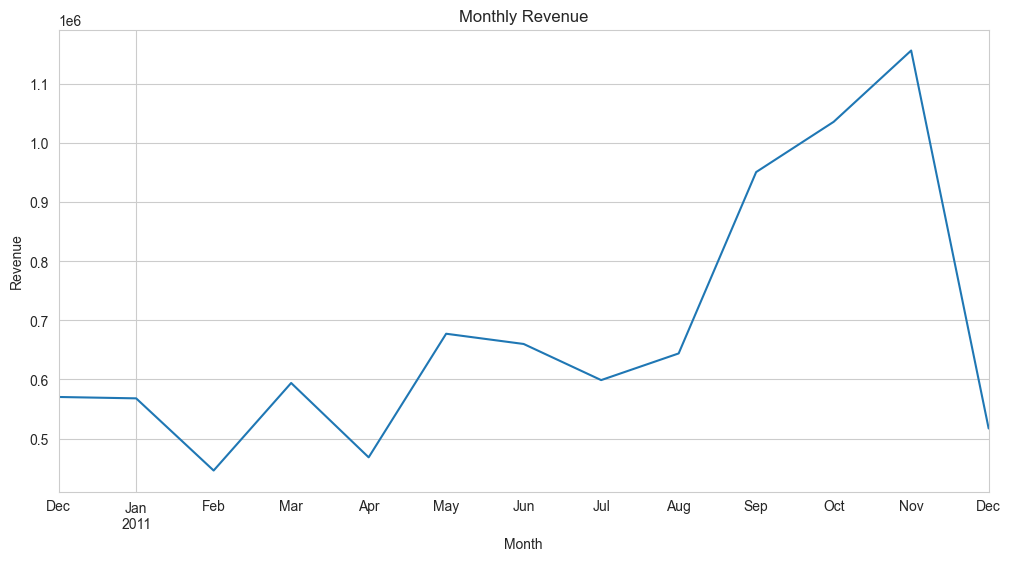

In [8]:
# Set 'invoicedate' as the index for time series analysis
df_time = df.set_index('invoicedate')

# Resample by month and sum the revenue (using the new 'ME' syntax)
monthly_revenue = df_time['revenue'].resample('ME').sum()

# Plotting the results
plt.figure(figsize=(12, 6))
monthly_revenue.plot(title='Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

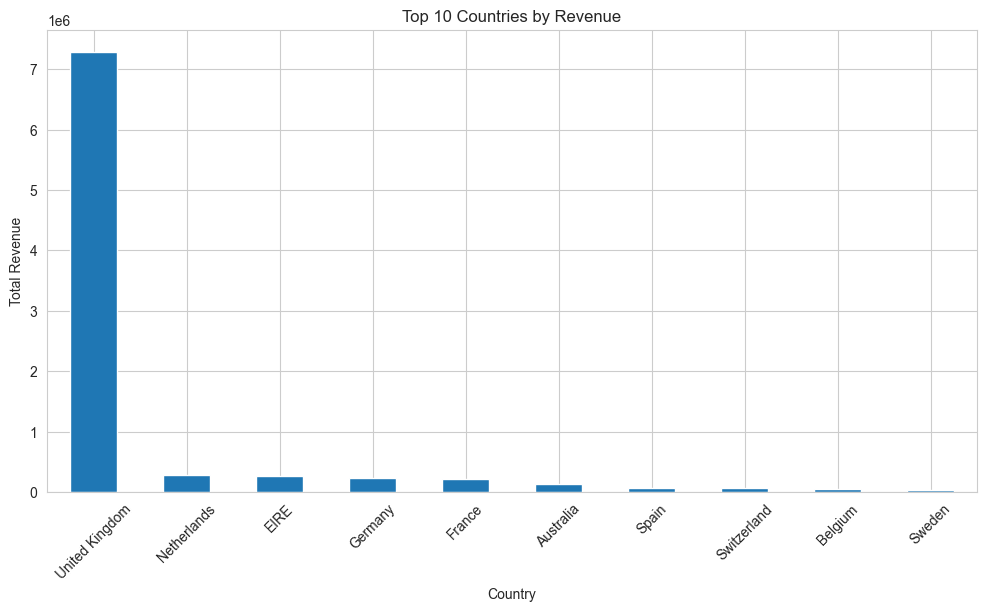

In [9]:
# Group by country and sum the revenue
country_revenue = df.groupby('country')['revenue'].sum().sort_values(ascending=False)

# Plotting top 10 countries
plt.figure(figsize=(12, 6))
country_revenue.head(10).plot(kind='bar', title='Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()